# Implementing Custom RandomSearchCV

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
import random
%matplotlib inline

x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

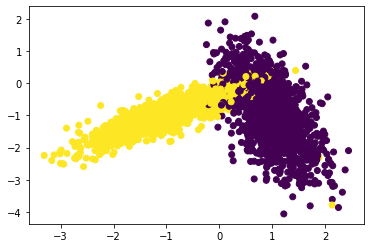

In [2]:
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [28]:
def RandomSearchCV(X, Y, a_b, kfold): # Random SearchCV function
    k = np.array(random.sample(range(a_b[0], a_b[1]), 10)) #Generating random 10 intergers
    k.sort()
    train_acc, cv_acc, train_mean, cv_mean = [], [], [], []
    val = len(X)//kfold
    for K in k:
        for j in tqdm(range(kfold)):
            test_indices = list(set(list(range((val*j), (val*(j+1))))))
            train_indices = list(set(list(range(0, len(X)))) - set(test_indices))            
            
            X_train = X[train_indices]
            Y_train = Y[train_indices]
            X_cv  = X[test_indices]
            Y_cv  = Y[test_indices]
            
            knn = KNeighborsClassifier(n_neighbors = K) #Creating KNN object
            knn.fit(X_train, Y_train) #Fitting into KNN
            
            pred = knn.predict(X_train) #Predicting
            train_acc.append(accuracy_score(Y_train, pred)) #Appending accuracy into train_acc
            
            pred = knn.predict(X_cv) #Predicting
            cv_acc.append(accuracy_score(Y_cv, pred)) #Appending accuracy into cv_acc
            
        train_mean.append(np.mean(np.array(train_acc))) #Taking mean of accuracy
        cv_mean.append(np.mean(np.array(cv_acc))) #Taking mean of accuracy
        
    return train_mean, cv_mean, k #Return

In [29]:
def best_param(acc_score, k):  #Function for getting best n_estimator/K  
    temp, dic = {}, {}
    for i in range(len(cv_acc)): #Creating dictionary of accuracy and K
        temp[cv_acc[i]] = k[i]
    sorted_temp = sorted(temp, reverse = True) #Sorting will give list
    for i in range(len(cv_acc)): #Recreating dictionary using above list
        dic[sorted_temp[i]] = temp.get(sorted_temp[i])
    best = list(dic.items())[0][1]
    print('Best K is:', best)
    return best #Return just one top K based on best accuracy

In [30]:
train_acc, cv_acc, K = RandomSearchCV(X_train, y_train, (1, 50), 10) #Calling RadomSearchCV

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.39it/s]


In [31]:
for i in range(len(train_acc)):
    print('Traning Mean Accuracy When K is {}: {}%'.format(K[i], round(train_acc[i], 4)*100)) #Printing Trianing Accuracy

Traning Mean Accuracy When K is 5: 96.22%
Traning Mean Accuracy When K is 10: 96.09%
Traning Mean Accuracy When K is 11: 96.04%
Traning Mean Accuracy When K is 23: 95.95%
Traning Mean Accuracy When K is 26: 95.89999999999999%
Traning Mean Accuracy When K is 32: 95.86%
Traning Mean Accuracy When K is 34: 95.84%
Traning Mean Accuracy When K is 38: 95.83%
Traning Mean Accuracy When K is 42: 95.82000000000001%
Traning Mean Accuracy When K is 44: 95.81%


In [32]:
for i in range(len(cv_acc)):
    print('CV Mean Accuracy When K is {}: {}%'.format(K[i], round(cv_acc[i], 4)*100)) #Printing CV Accuracy

CV Mean Accuracy When K is 5: 95.12%
CV Mean Accuracy When K is 10: 95.23%
CV Mean Accuracy When K is 11: 95.28%
CV Mean Accuracy When K is 23: 95.37%
CV Mean Accuracy When K is 26: 95.41%
CV Mean Accuracy When K is 32: 95.44%
CV Mean Accuracy When K is 34: 95.46%
CV Mean Accuracy When K is 38: 95.48%
CV Mean Accuracy When K is 42: 95.5%
CV Mean Accuracy When K is 44: 95.52000000000001%


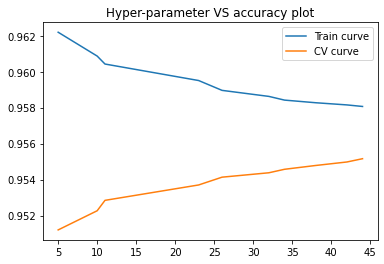

In [33]:
plt.plot(K, train_acc, label='Train curve') 
plt.plot(K, cv_acc, label='CV curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [34]:
best_K = best_param(cv_acc, K) #Calling best_param to get best K

Best K is: 44


In [35]:
clf = KNeighborsClassifier(n_neighbors = best_K) 
clf.fit(X_train, y_train) 
pred_test = clf.predict(X_test) #Predicting for Test Data
print('Test Accuracy: {} %'.format(accuracy_score(y_test, pred_test)*100))

Test Accuracy: 96.76 %


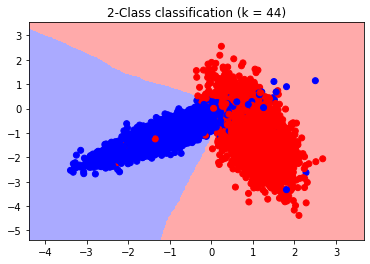

In [36]:
def plot_decision_boundary(X1, X2, y, clf): #Reference : Assignment_4_Reference
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, clf)